$$\frac{\sum{\alpha}(\hat{y}\neq  y)}{\sum{\alpha}}$$
My first LateX in Jupyter

In [1]:
import pandas as pd
loans=pd.read_csv('lending-club-data.csv')

C:\Users\shuoyan001\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
loans = loans[loans.columns.drop('bad_loans')]

In [85]:
target = 'safe_loans'
features = ['grade',                     # grade of the loan (categorical)
            'sub_grade_num',             # sub-grade of the loan as a number from 0 to 1
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'payment_inc_ratio',         # ratio of the monthly payment to income
            'delinq_2yrs',               # number of delinquincies
             'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
            'int_rate',                  # interest rate of the loan
            'total_rec_int',             # interest received to date
            'annual_inc',                # annual income of borrower
            'funded_amnt',               # amount committed to the loan
            'funded_amnt_inv',           # amount committed by investors for the loan
            'installment',               # monthly payment owed by the borrower
           ]
loans.iloc[8021]

sub_grade_num                     0.4000
short_emp                         0.0000
emp_length_num                    4.0000
dti                              12.7300
payment_inc_ratio                12.1670
delinq_2yrs                       0.0000
delinq_2yrs_zero                  1.0000
inq_last_6mths                    1.0000
last_delinq_none                  1.0000
last_major_derog_none             1.0000
open_acc                          6.0000
pub_rec                           0.0000
pub_rec_zero                      1.0000
revol_util                       30.5000
total_rec_late_fee               18.2281
int_rate                          5.9900
total_rec_int                  1202.3000
annual_inc                    36000.0000
funded_amnt                   12000.0000
funded_amnt_inv               12000.0000
installment                     365.0100
safe_loans                       -1.0000
grade_A                           1.0000
grade_B                           0.0000
grade_C         

In [16]:
loans=loans[features+[target]].dropna()
loans=pd.get_dummies(loans)

In [17]:
tr_idx=pd.read_json('module-8-assignment-1-train-idx.json')[0]
va_idx=pd.read_json('module-8-assignment-1-validation-idx.json')[0]

In [18]:
train_data=loans.iloc[tr_idx]
valid_data=loans.iloc[va_idx]

In [20]:
import numpy as np
from sklearn import ensemble

In [25]:
classifier_gb=ensemble.GradientBoostingClassifier(max_depth=6, n_estimators=5)

In [26]:
classifier_gb.fit(train_data[train_data.columns.drop('safe_loans')].values,train_data['safe_loans'].values)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=5, presort='auto',
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [31]:
validation_safe_loans = valid_data[valid_data[target] == 1]
validation_risky_loans = valid_data[valid_data[target] == -1]

sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

sample = sample_validation_data_safe.append(sample_validation_data_risky)
sample[sample.columns.drop('safe_loans')].values
sample['safe_loans']

22    1
26    1
24   -1
41   -1
Name: safe_loans, dtype: int64

In [30]:
classifier_gb.predict(sample[sample.columns.drop('safe_loans')].values)

array([ 1,  1, -1,  1], dtype=int64)

In [50]:
classifier_gb.predict_proba(sample[sample.columns.drop('safe_loans')].values)

array([[0.41642331, 0.58357669],
       [0.46949689, 0.53050311],
       [0.53807792, 0.46192208],
       [0.39591639, 0.60408361]])

In [34]:
classifier_gb.score(valid_data[valid_data.columns.drop('safe_loans')].values,valid_data['safe_loans'].values)

0.6614605773373546

In [36]:
valid_data['gb_pred']=classifier_gb.predict(valid_data[valid_data.columns.drop('safe_loans')].values)

C:\Users\shuoyan001\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
np.sum((valid_data['gb_pred']==1)&(valid_data['safe_loans']==-1))

1652

In [45]:
np.sum((valid_data['gb_pred']==-1)&(valid_data['safe_loans']==1))

1491

In [46]:
1652*20000+1491*10000

47950000

In [64]:
valid_data['proba']=classifier_gb.predict_proba(valid_data[valid_data.columns.drop(['safe_loans','gb_pred'])].values)[:,1]

C:\Users\shuoyan001\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [84]:
valid_data.sort_values('proba',ascending=False)

,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,last_major_derog_none,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,gb_pred,proba
8021,0.4,0,4,12.73,12.167000,0.0,1.0,1.0,1,1,...,0,0,0,0,0,0,0,0,1,0.673059
92079,0.2,0,8,10.02,3.493570,0.0,1.0,0.0,1,1,...,0,0,0,0,0,0,0,1,1,0.661468
68973,0.4,0,11,12.46,6.521150,0.0,1.0,1.0,1,1,...,0,0,0,0,0,0,0,0,1,0.661468
19865,1.0,0,3,14.54,2.846460,0.0,1.0,1.0,1,1,...,0,0,0,0,0,0,0,0,1,0.661468
19954,0.8,0,5,9.24,4.749600,0.0,1.0,0.0,1,1,...,0,0,0,0,0,0,0,0,1,0.661468
15072,0.4,0,10,13.60,3.256170,0.0,1.0,0.0,1,1,...,0,0,0,0,0,0,0,0,1,0.661468
14481,0.2,0,5,8.16,2.469890,0.0,1.0,0.0,1,1,...,0,0,0,0,0,0,0,0,1,0.661468
69995,0.4,0,11,8.73,3.401080,0.0,1.0,4.0,1,1,...,0,0,0,0,0,0,0,0,1,0.661468
83742,0.4,0,6,2.30,1.691560,0.0,1.0,1.0,1,1,...,0,0,0,0,0,0,0,0,1,0.661468
13613,0.8,0,2,13.65,1.750650,0.0,1.0,1.0,1,1,...,0,0,0,0,0,0,0,0,1,0.661468


In [74]:
model10=ensemble.GradientBoostingClassifier(max_depth=6, n_estimators=10)
model50=ensemble.GradientBoostingClassifier(max_depth=6, n_estimators=50)
model100=ensemble.GradientBoostingClassifier(max_depth=6, n_estimators=100)
model200=ensemble.GradientBoostingClassifier(max_depth=6, n_estimators=200)
model500=ensemble.GradientBoostingClassifier(max_depth=6, n_estimators=500)

model10.fit(train_data[train_data.columns.drop('safe_loans')].values,train_data['safe_loans'].values)
model50.fit(train_data[train_data.columns.drop('safe_loans')].values,train_data['safe_loans'].values)
model100.fit(train_data[train_data.columns.drop('safe_loans')].values,train_data['safe_loans'].values)
model200.fit(train_data[train_data.columns.drop('safe_loans')].values,train_data['safe_loans'].values)
model500.fit(train_data[train_data.columns.drop('safe_loans')].values,train_data['safe_loans'].values)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [76]:
print(model10.score(valid_data[valid_data.columns.drop(['safe_loans','gb_pred','proba'])].values,valid_data['safe_loans'].values))
print(model50.score(valid_data[valid_data.columns.drop(['safe_loans','gb_pred','proba'])].values,valid_data['safe_loans'].values))
print(model100.score(valid_data[valid_data.columns.drop(['safe_loans','gb_pred','proba'])].values,valid_data['safe_loans'].values))
print(model200.score(valid_data[valid_data.columns.drop(['safe_loans','gb_pred','proba'])].values,valid_data['safe_loans'].values))
print(model500.score(valid_data[valid_data.columns.drop(['safe_loans','gb_pred','proba'])].values,valid_data['safe_loans'].values))

0.6664153382162861
0.6844032744506678
0.6890348987505386
0.686234381732012
0.6870960792761741


In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
def make_figure(dim, title, xlabel, ylabel, legend):
    plt.rcParams['figure.figsize'] = dim
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend is not None:
        plt.legend(loc=legend, prop={'size':15})
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

In [80]:
val_1=1-(model10.score(valid_data[valid_data.columns.drop(['safe_loans','gb_pred','proba'])].values,valid_data['safe_loans'].values))
val_2=1-(model50.score(valid_data[valid_data.columns.drop(['safe_loans','gb_pred','proba'])].values,valid_data['safe_loans'].values))
val_3=1-(model100.score(valid_data[valid_data.columns.drop(['safe_loans','gb_pred','proba'])].values,valid_data['safe_loans'].values))
val_4=1-(model200.score(valid_data[valid_data.columns.drop(['safe_loans','gb_pred','proba'])].values,valid_data['safe_loans'].values))
val_5=1-(model500.score(valid_data[valid_data.columns.drop(['safe_loans','gb_pred','proba'])].values,valid_data['safe_loans'].values))
validation_errors=[val_1,val_2,val_3,val_4,val_5]

In [82]:
tr_1=1-(model10.score(train_data[train_data.columns.drop('safe_loans')].values,train_data['safe_loans'].values))
tr_2=1-(model50.score(train_data[train_data.columns.drop('safe_loans')].values,train_data['safe_loans'].values))
tr_3=1-(model100.score(train_data[train_data.columns.drop('safe_loans')].values,train_data['safe_loans'].values))
tr_4=1-(model200.score(train_data[train_data.columns.drop('safe_loans')].values,train_data['safe_loans'].values))
tr_5=1-(model500.score(train_data[train_data.columns.drop('safe_loans')].values,train_data['safe_loans'].values))
training_errors=[tr_1,tr_2,tr_3,tr_4,tr_5]

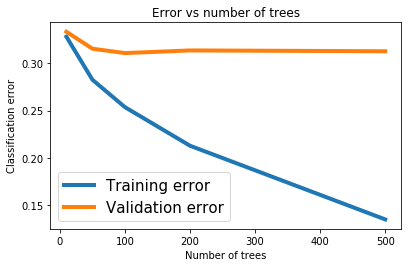

In [83]:
plt.plot([10, 50, 100, 200, 500], training_errors, linewidth=4.0, label='Training error')
plt.plot([10, 50, 100, 200, 500], validation_errors, linewidth=4.0, label='Validation error')

make_figure(dim=(10,5), title='Error vs number of trees',
            xlabel='Number of trees',
            ylabel='Classification error',
            legend='best')